In [286]:
import sympy as smp
import matplotlib.pyplot as plt
from sympy.plotting import plot
from sympy.plotting import plot3d
import numpy as np

In [287]:
 m,n = smp.symbols('m n', integer=True, postive=True)

In [288]:
x,t = smp.symbols('x t')
UWave =smp.Function('UWave')
summ =smp.Function('summ')
UWsumm =smp.Function('UWsumm')
f =smp.Function('f')
A=smp.Function('A')


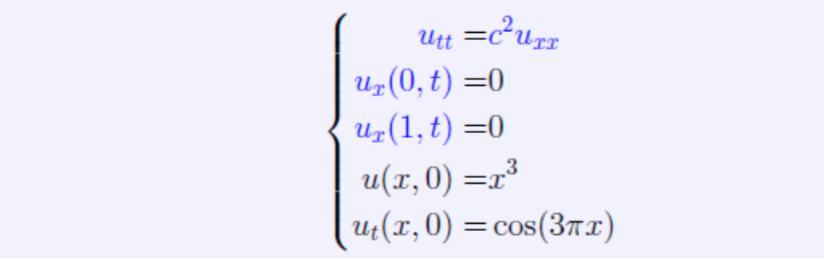

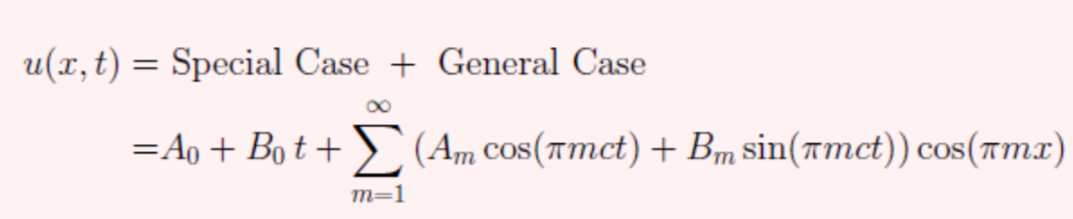

The u_t initial condition gives us 

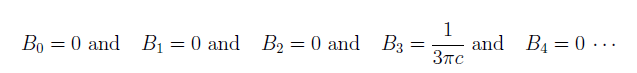

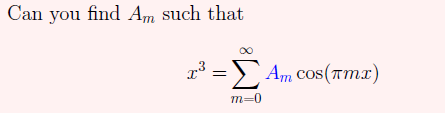

In [289]:
UWave = UWave(x,t)
summ=summ(x)
f = f(x)
A=A(m)


Puedes jugar con varios ejemplos de funciones f abajo
Fija bien si son par, impar o no.  Nota que pasa con las coeeffs A y B
cuando la funcion es par o impar
Nota como se define una funcion "piecewise".

In [290]:

f=x**3

# f=-x*(x-1)

# f=x*smp.sin(3*x)

# f = -x**2+(smp.pi)**2

# f=-(x-smp.pi)*(x+smp.pi)

# f = smp.Piecewise(
#     (0, (-smp.pi < x)& (x < -1)),
#     (x+1,(-1<x)&(x<0)),(-x+1,(0<x)&(x<1)),
#     ( 0, True )
# )

# f = smp.Piecewise(
#     (-1, (-smp.pi < x)& (x < 0)),
#     (1,(0<x)&(x<smp.pi)),
#     ( 0, True )
# )


In [291]:
f

x**3

Abajo calculamos los productos escalares <cos(m*pi*x),cos(m*pi*x)>
Significa que dividimos todos los terminos por (1/2) excepto a A0, que es didido por 1


In [292]:
CosMdotCosM = smp.integrate(smp.cos(smp.pi*m*x)*smp.cos(smp.pi*m*x),(x,0,1)).simplify()


In [293]:
CosMdotCosM

Piecewise((1/2, (m > 0) | (m < 0)), (1, True))

IntegrandA es la expresion que integramos para obtener las coeficientes A

In [294]:
IntegrandA = f*smp.cos(smp.pi*m*x)*2


In [295]:
IntegrandA

2*x**3*cos(pi*m*x)

A depende de m

In [296]:
A = smp.integrate(IntegrandA,(x,0,1)).simplify()
# B = smp.integrate(expB,(x,-smp.pi,smp.pi)).simplify()

In [297]:
A

Piecewise((6*((-1)**m*pi**2*m**2 - 2*(-1)**m + 2)/(pi**4*m**4), (m > 0) | (m < 0)), (1/2, True))

In [298]:
A0 = smp.integrate(f,(x,0,1)).simplify()

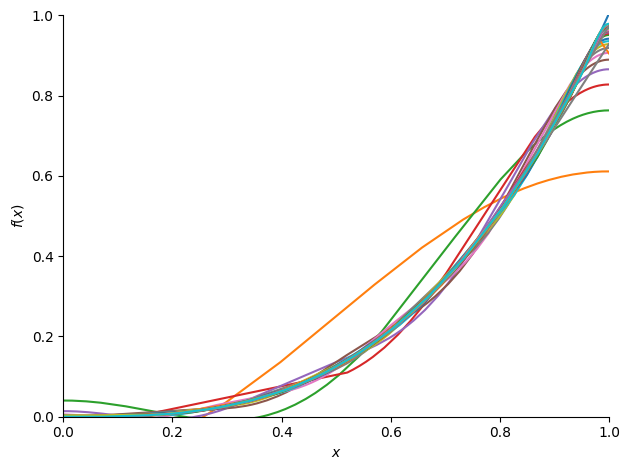

In [299]:
summ = A0

# cambia ylim segun la funcion
grp = plot(f,show=False,xlim=[0,1],ylim=[0,1])
# plot f, la funcion original
for i in range(1,30):
#     en cada paso, summ es una aproximacion de f con un termino
#     mas de cos y un termino mas de sin de la serie de Fourier
    summ = summ + A.subs(m,i)*smp.cos(smp.pi*i*x)
    # print(summ)
    dl = plot(summ,show=False)
    grp.extend(dl)
    # plt.plot(summ,show=True)
# Podemos ver como las aproximaciones se acercan a la funcion original
grp.show()     
    

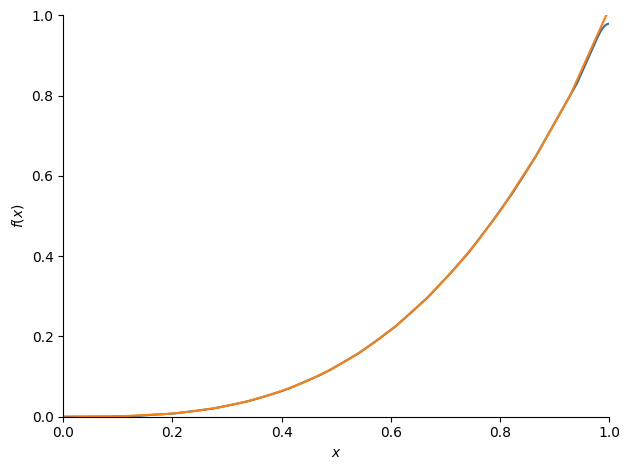

In [300]:
# Aqui vemos la ultima aproximacion sola
plot(summ,f,show=True,xlim=[0,1],ylim=[0,1])

In [301]:
summ

6*(4 - pi**2)*cos(pi*x)/pi**4 + 3*cos(2*pi*x)/(2*pi**2) + 2*(4 - 9*pi**2)*cos(3*pi*x)/(27*pi**4) + 3*cos(4*pi*x)/(8*pi**2) + 6*(4 - 25*pi**2)*cos(5*pi*x)/(625*pi**4) + cos(6*pi*x)/(6*pi**2) + 6*(4 - 49*pi**2)*cos(7*pi*x)/(2401*pi**4) + 3*cos(8*pi*x)/(32*pi**2) + 2*(4 - 81*pi**2)*cos(9*pi*x)/(2187*pi**4) + 3*cos(10*pi*x)/(50*pi**2) + 6*(4 - 121*pi**2)*cos(11*pi*x)/(14641*pi**4) + cos(12*pi*x)/(24*pi**2) + 6*(4 - 169*pi**2)*cos(13*pi*x)/(28561*pi**4) + 3*cos(14*pi*x)/(98*pi**2) + 2*(4 - 225*pi**2)*cos(15*pi*x)/(16875*pi**4) + 3*cos(16*pi*x)/(128*pi**2) + 6*(4 - 289*pi**2)*cos(17*pi*x)/(83521*pi**4) + cos(18*pi*x)/(54*pi**2) + 6*(4 - 361*pi**2)*cos(19*pi*x)/(130321*pi**4) + 3*cos(20*pi*x)/(200*pi**2) + 2*(4 - 441*pi**2)*cos(21*pi*x)/(64827*pi**4) + 3*cos(22*pi*x)/(242*pi**2) + 6*(4 - 529*pi**2)*cos(23*pi*x)/(279841*pi**4) + cos(24*pi*x)/(96*pi**2) + 6*(4 - 625*pi**2)*cos(25*pi*x)/(390625*pi**4) + 3*cos(26*pi*x)/(338*pi**2) + 2*(4 - 729*pi**2)*cos(27*pi*x)/(177147*pi**4) + 3*cos(28*pi*x)/(

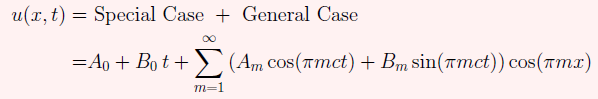

In [302]:

UWsumm=A0
# empezamos con summ = A0 = (integral f) / 2PI
# cambia ylim segun la funcion
# grp = plot(f,show=False,xlim=[-smp.pi,smp.pi],ylim=[-4,4])
# plot f, la funcion original
for i in range(1,6):
#     en cada paso, summ es una aproximacion de f con un termino
#     mas de cos y un termino mas de sin de la serie de Fourier
    UWsumm = UWsumm +A.subs(m,i)*smp.cos(smp.pi*i*x)*smp.cos(smp.pi*i*t)
    # print(summ)
    # dl = plot(summ,show=False)
    # grp.extend(dl)
    # plt.plot(summ,show=True)

# No olvidamos el termino b3, el unico Bm =/= 0

UWsumm = UWsumm+(1/(3*smp.pi))*smp.sin(smp.pi*3*t)*smp.cos(smp.pi*3*x)

# Podemos ver como las aproximaciones se acercan a la funcion original
# grp.show()   

In [303]:
UWsumm

sin(3*pi*t)*cos(3*pi*x)/(3*pi) + 6*(4 - pi**2)*cos(pi*t)*cos(pi*x)/pi**4 + 3*cos(2*pi*t)*cos(2*pi*x)/(2*pi**2) + 2*(4 - 9*pi**2)*cos(3*pi*t)*cos(3*pi*x)/(27*pi**4) + 3*cos(4*pi*t)*cos(4*pi*x)/(8*pi**2) + 6*(4 - 25*pi**2)*cos(5*pi*t)*cos(5*pi*x)/(625*pi**4) + 1/4

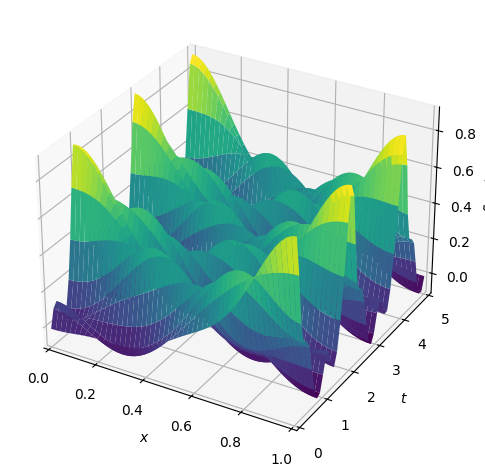

In [304]:
plot3d(UWsumm, (x, 0, 1), (t, 0, 5))

#### 

In [305]:
grp = plot(f,show=False,xlim=[0,1],ylim=[0,1])

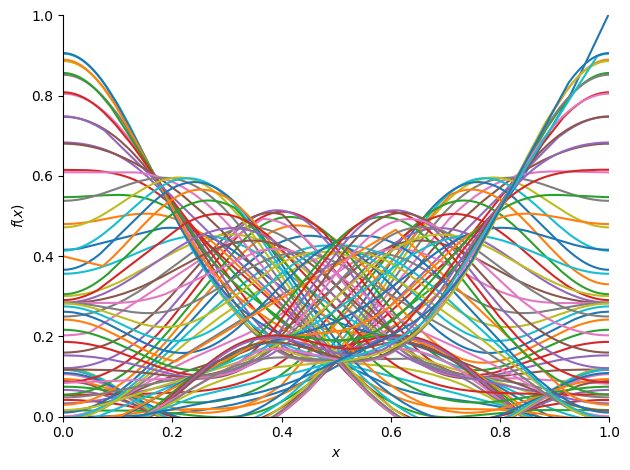

In [306]:


tr = np.arange(0,2,0.025)
for t0 in tr:
#     en cada paso, summ es una aproximacion de f con un termino
#     mas de cos y un termino mas de sin de la serie de Fourier
    # print(summ)
    dl = plot(UWsumm.subs(t,t0),show=False)
    grp.extend(dl)
    # plt.plot(summ,show=True)
# Podemos ver como las aproximaciones se acercan a la funcion original
grp.show()     
    